In [ ]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(dplyr))
suppressMessages(library(plyr))
suppressMessages(library(cowplot))

source("~/scripts/functions.R")

setwd("/frazer01/home/jennifer/jn_projects/ppc_pilot/pipeline")

In [2]:
load(paste("2.scRNA_seq", "integrated.robj", sep = "/"), verbose = T)

Loading objects:
  integrated


In [3]:
orig = integrated

In [5]:
DefaultAssay(integrated) = "RNA"
integrated[["percent.mt"]] <- PercentageFeatureSet(integrated, pattern = "^MT-")

meta = integrated@meta.data
meta = add_rownames(merge(meta, Embeddings(integrated, "umap"), by = "row.names", all.x = T))
meta$seurat_id = rownames(meta)

In [124]:
orig

An object of class Seurat 
64492 features across 99819 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Filter #1

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,UMAP_1,UMAP_2,seurat_id
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
AAACCCAAGAACCGCA-6_3,aggr_individual,959,680,15.119917,1.6630389,7.0315962,AAACCCAAGAACCGCA-6_3
AAACCCAAGAAGTCAT-2_3,aggr_individual,21162,5803,6.521123,0.2182443,-3.6337244,AAACCCAAGAAGTCAT-2_3
AAACCCAAGACAGCTG-2_3,aggr_individual,30095,6762,6.732015,1.2696760,-6.2317190,AAACCCAAGACAGCTG-2_3
AAACCCAAGACCATGG-1_3,aggr_individual,12245,3585,14.691711,12.2681176,-1.9510411,AAACCCAAGACCATGG-1_3
AAACCCAAGAGGGTCT-1_1,scRNA_10x_MIX_PPC_001,4718,2103,11.572700,-4.6505807,-0.5628369,AAACCCAAGAGGGTCT-1_1
AAACCCAAGATGCGAC-5_3,aggr_individual,5192,2376,10.458398,-5.4808143,-3.5976989,AAACCCAAGATGCGAC-5_3



    FALSE      TRUE 
0.1052505 0.8947495 


     FALSE       TRUE 
0.08509402 0.91490598 

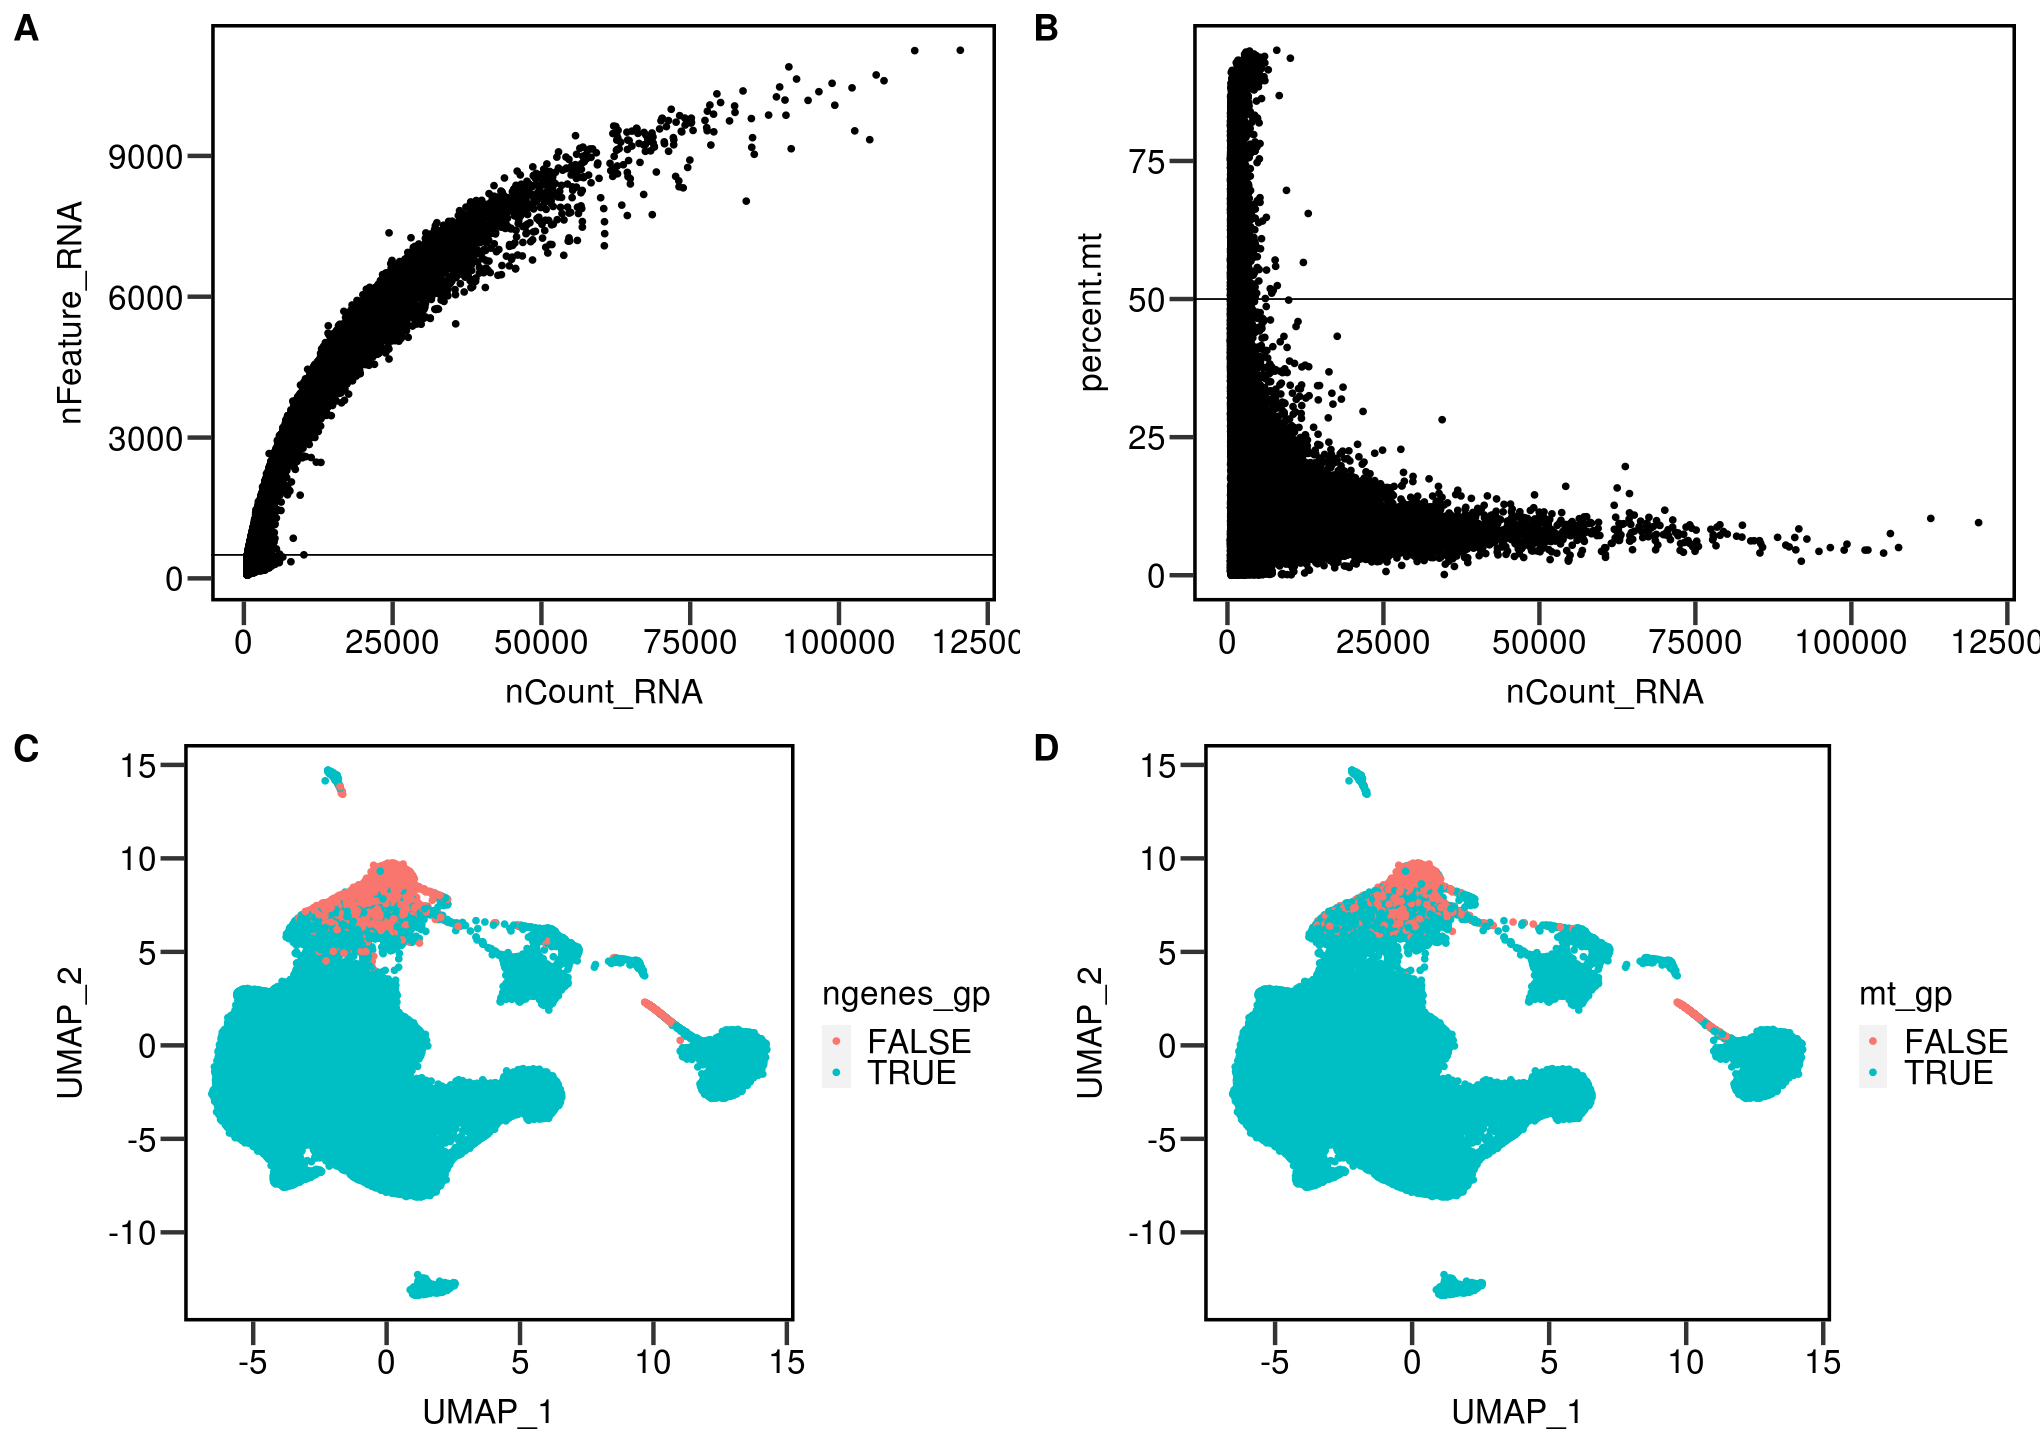

In [6]:
mt.thresh = 50
ngenes.thresh = 500

p1 = ggplot(meta, aes(x = nCount_RNA, y = nFeature_RNA)) + geom_point() + jn_theme + geom_hline(yintercept = ngenes.thresh)
p2 = ggplot(meta, aes(x = nCount_RNA, y = percent.mt)) + geom_point() + jn_theme + geom_hline(yintercept = mt.thresh)
head(meta)

meta$ngenes_gp = ifelse(meta$nFeature_RNA > ngenes.thresh, TRUE, FALSE)
meta$mt_gp = ifelse(meta$percent.mt > mt.thresh, FALSE, TRUE)

table(meta$ngenes_gp) / nrow(meta)
table(meta$mt_gp) / nrow(meta)

p3 = ggplot(meta, aes(x = UMAP_1, y = UMAP_2, color = ngenes_gp)) + geom_point() + jn_theme
p4 = ggplot(meta, aes(x = UMAP_1, y = UMAP_2, color = mt_gp)) + geom_point() + jn_theme

options(repr.plot.width = 17, repr.plot.height = 12)
plot_grid(p1, p2, p3, p4, labels = "AUTO", label_size = 22, nrow = 2) 

In [7]:
head(meta,2)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,UMAP_1,UMAP_2,seurat_id,ngenes_gp,mt_gp
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
AAACCCAAGAACCGCA-6_3,aggr_individual,959,680,15.119917,1.6630389,7.031596,AAACCCAAGAACCGCA-6_3,TRUE,TRUE
AAACCCAAGAAGTCAT-2_3,aggr_individual,21162,5803,6.521123,0.2182443,-3.633724,AAACCCAAGAAGTCAT-2_3,TRUE,TRUE


In [8]:
integrated@meta.data = meta

In [9]:
head(integrated@meta.data)
DefaultAssay(integrated) = "integrated"

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,UMAP_1,UMAP_2,seurat_id,ngenes_gp,mt_gp
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>
AAACCCAAGAACCGCA-6_3,aggr_individual,959,680,15.119917,1.6630389,7.0315962,AAACCCAAGAACCGCA-6_3,TRUE,TRUE
AAACCCAAGAAGTCAT-2_3,aggr_individual,21162,5803,6.521123,0.2182443,-3.6337244,AAACCCAAGAAGTCAT-2_3,TRUE,TRUE
AAACCCAAGACAGCTG-2_3,aggr_individual,30095,6762,6.732015,1.2696760,-6.2317190,AAACCCAAGACAGCTG-2_3,TRUE,TRUE
AAACCCAAGACCATGG-1_3,aggr_individual,12245,3585,14.691711,12.2681176,-1.9510411,AAACCCAAGACCATGG-1_3,TRUE,TRUE
AAACCCAAGAGGGTCT-1_1,scRNA_10x_MIX_PPC_001,4718,2103,11.572700,-4.6505807,-0.5628369,AAACCCAAGAGGGTCT-1_1,TRUE,TRUE
AAACCCAAGATGCGAC-5_3,aggr_individual,5192,2376,10.458398,-5.4808143,-3.5976989,AAACCCAAGATGCGAC-5_3,TRUE,TRUE


In [10]:
integrated = FindNeighbors(integrated, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 99819
Number of edges: 3124735

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9590
Number of communities: 9
Elapsed time: 59 seconds


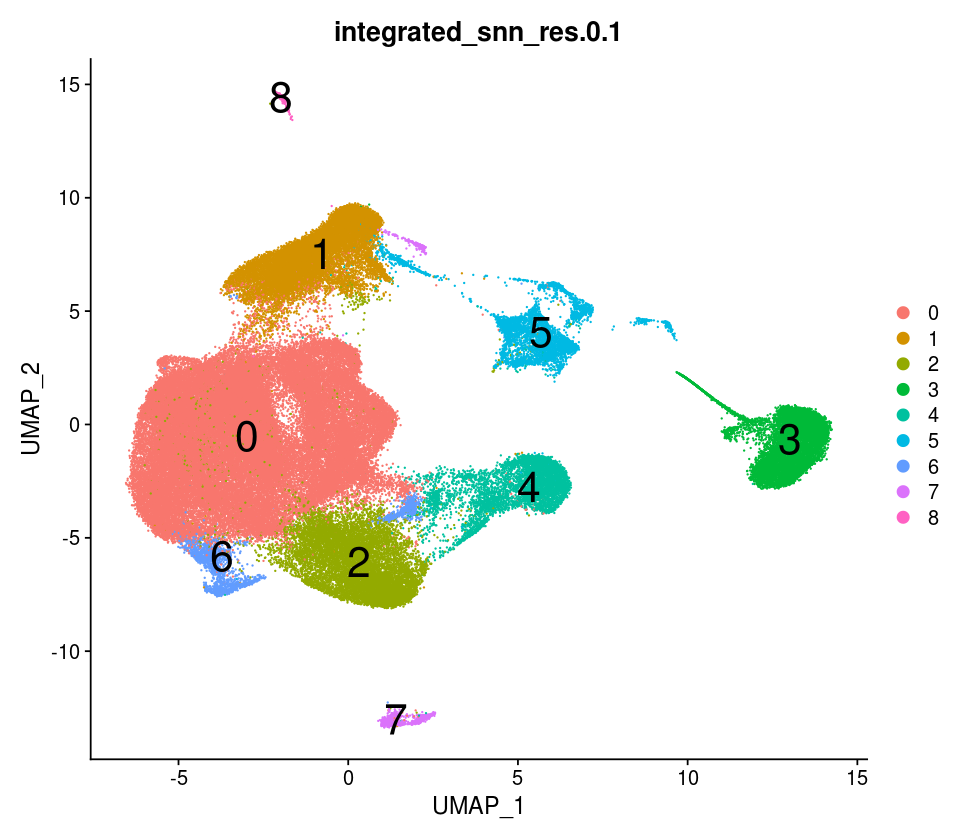

In [11]:
integrated = FindClusters(integrated, resolution = 0.1)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(integrated, group.by = "integrated_snn_res.0.1", label = T, label.size = 9)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 99819
Number of edges: 3124735

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9504
Number of communities: 11
Elapsed time: 56 seconds


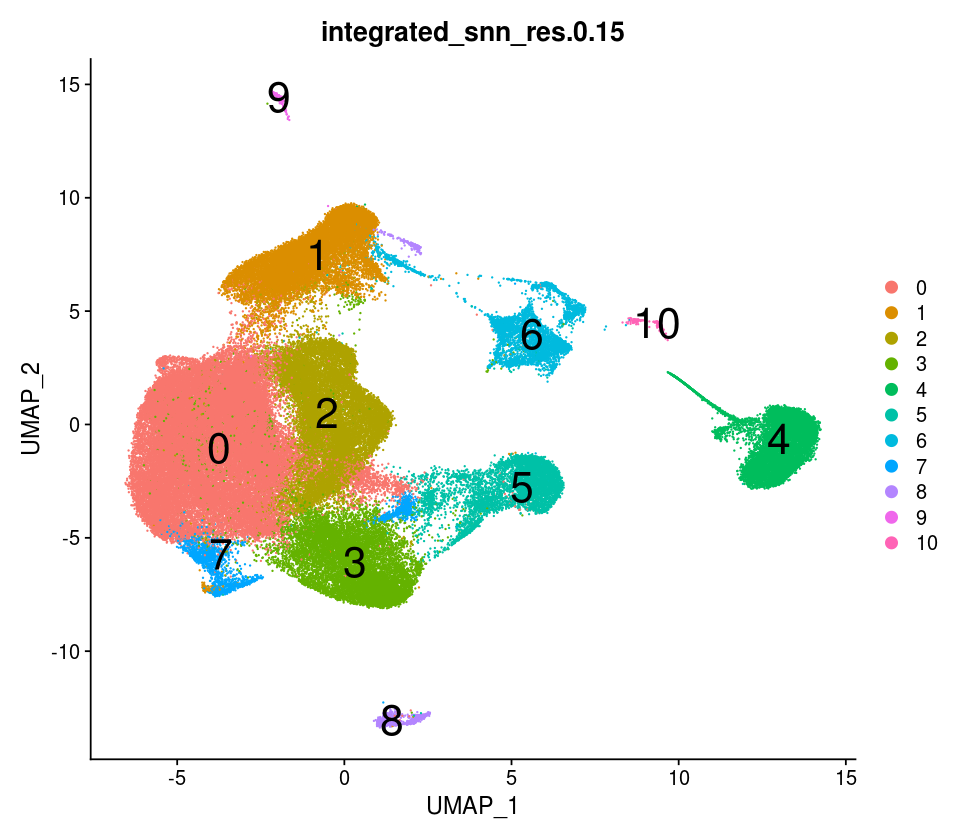

In [12]:
integrated = FindClusters(integrated, resolution = 0.15)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(integrated, group.by = "integrated_snn_res.0.15", label = T, label.size = 9)

cells 2 remove: 11677



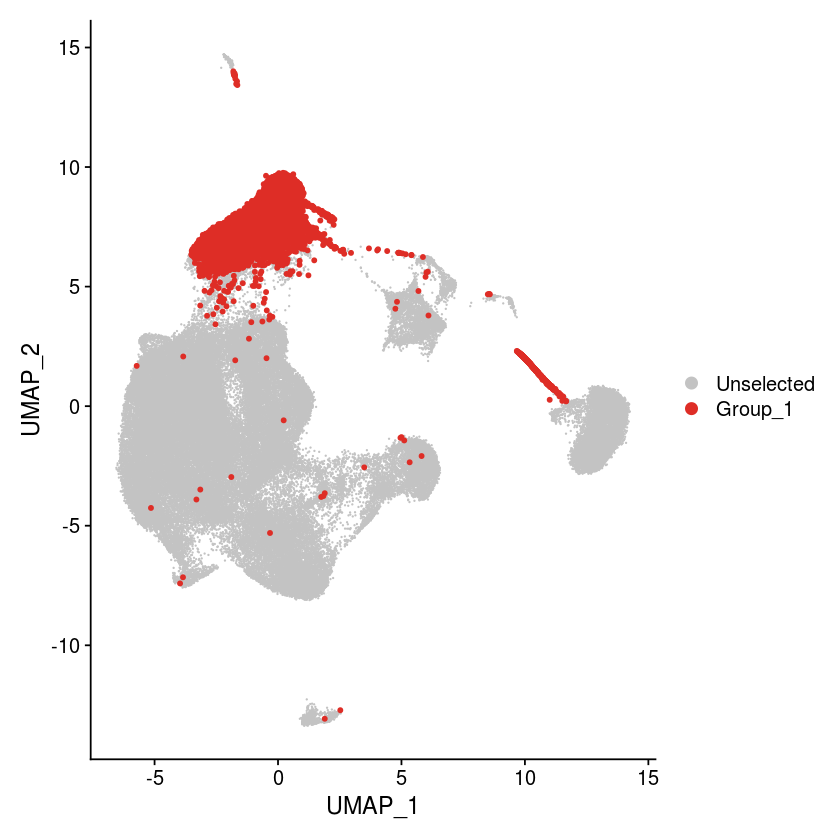

In [24]:
cells2remove = unique(rownames(integrated@meta.data[integrated@meta.data$percent.mt > 50 | integrated@meta.data$nFeature_RNA < 500 ,]))

message(paste("cells 2 remove:", length(cells2remove)))

options(repr.plot.height = 7, repr.plot.width = 7)
DimPlot(integrated, cells.highlight = cells2remove)



An object of class Seurat 
64492 features across 88142 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 88142
Number of edges: 2758267

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9549
Number of communities: 11
Elapsed time: 47 seconds


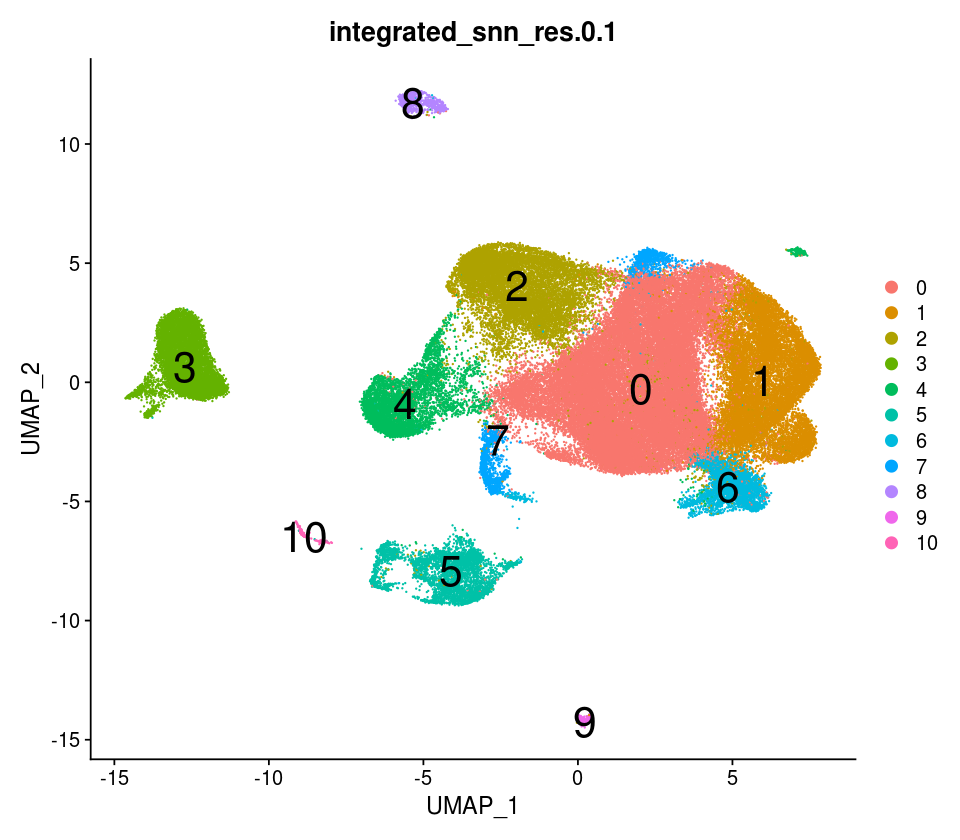

In [25]:
subset = subset(integrated, cells = rownames(integrated@meta.data[!rownames(integrated@meta.data) %in% cells2remove,]))

subset

subset <- ScaleData(subset, verbose = FALSE)
subset <- RunPCA(subset, npcs = 30, verbose = FALSE)
subset <- RunUMAP(subset, reduction = "pca", dims = 1:30, verbose = F)

subset = FindNeighbors(subset, dims = 1:30)
subset = FindClusters(subset, resolution = 0.1)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(subset, group.by = "integrated_snn_res.0.1", label = T, label.size = 9)

# Filter #2

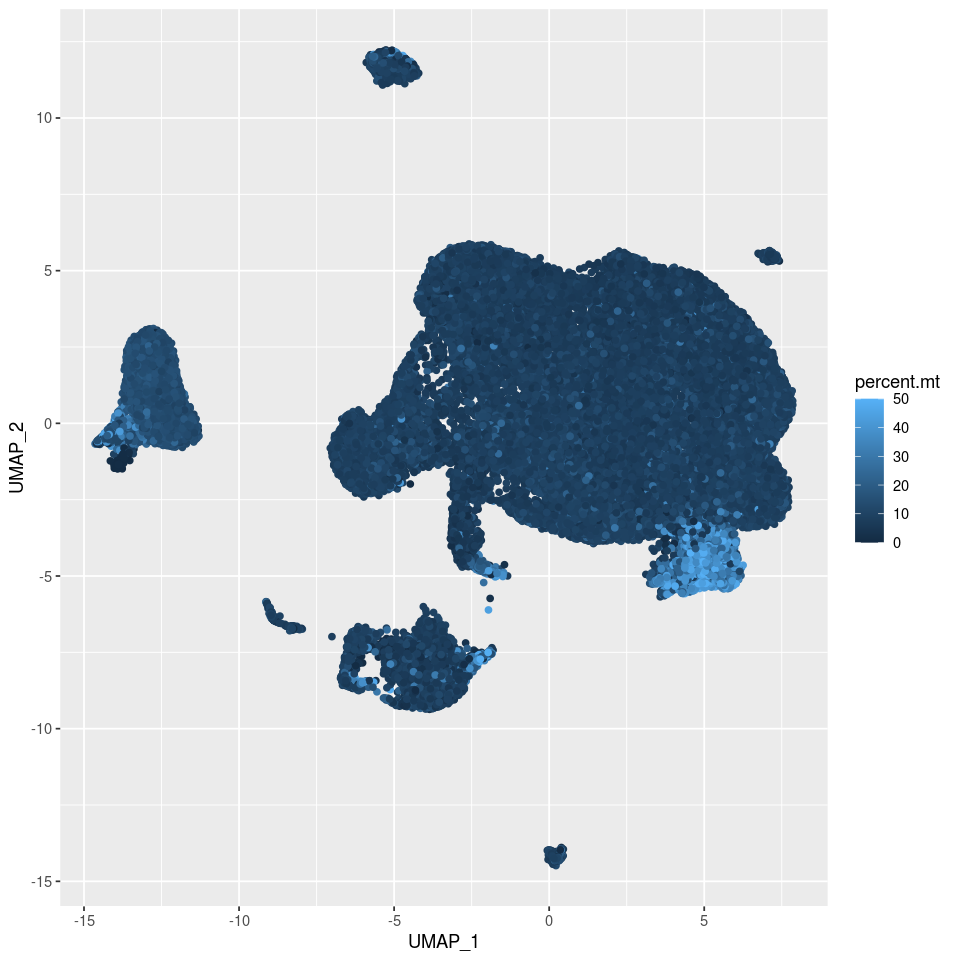

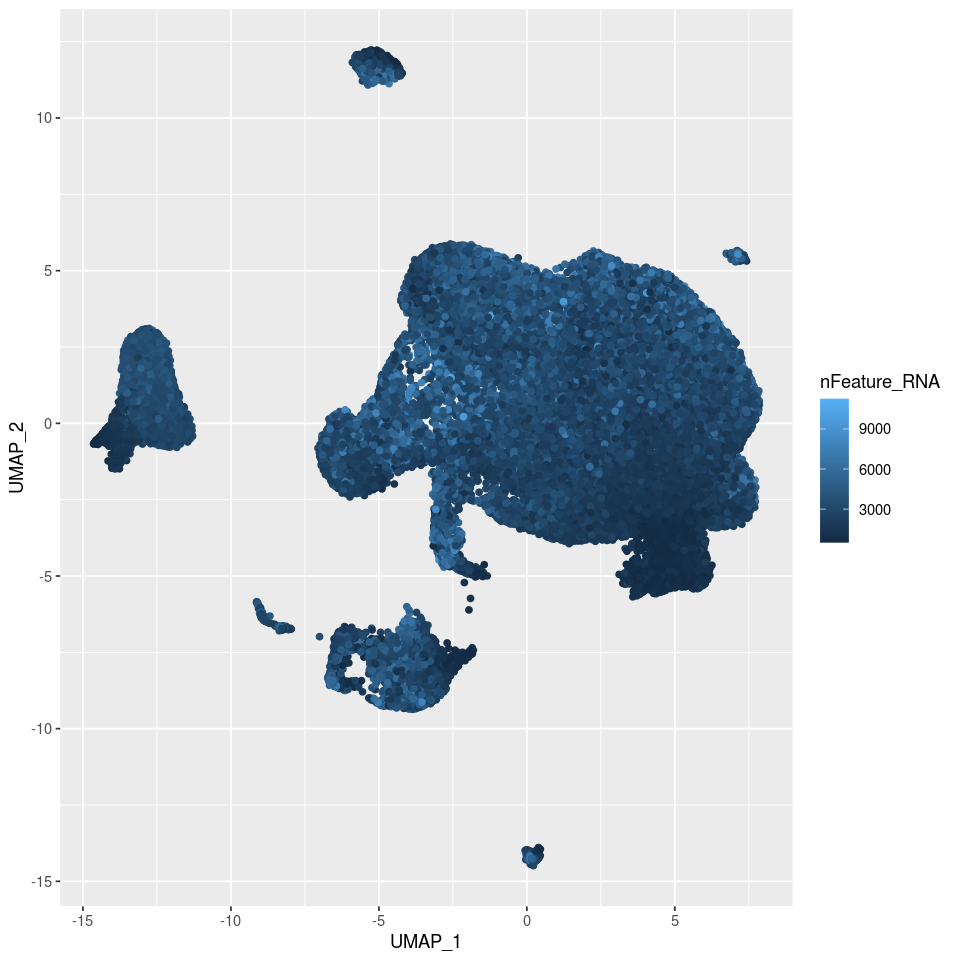

In [26]:
subset@meta.data[,c("UMAP_1", "UMAP_2")] = NULL
subset@meta.data = add_rownames(merge(subset@meta.data, Embeddings(subset, "umap"), by = "row.names"))

options(repr.plot.height = 8, repr.plot.width = 8)
ggplot(subset@meta.data, aes( x = UMAP_1, y = UMAP_2, color = percent.mt)) + geom_point()
ggplot(subset@meta.data, aes( x = UMAP_1, y = UMAP_2, color = nFeature_RNA)) + geom_point()

cells2remove: 3884



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1471 23.1559 33.8405 31.3580 41.6100 50.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  500.0   595.0   724.0   815.7   924.0  4309.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.958   8.393   9.354  10.528  49.953 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    500    2057    2776    2968    3591   11250 

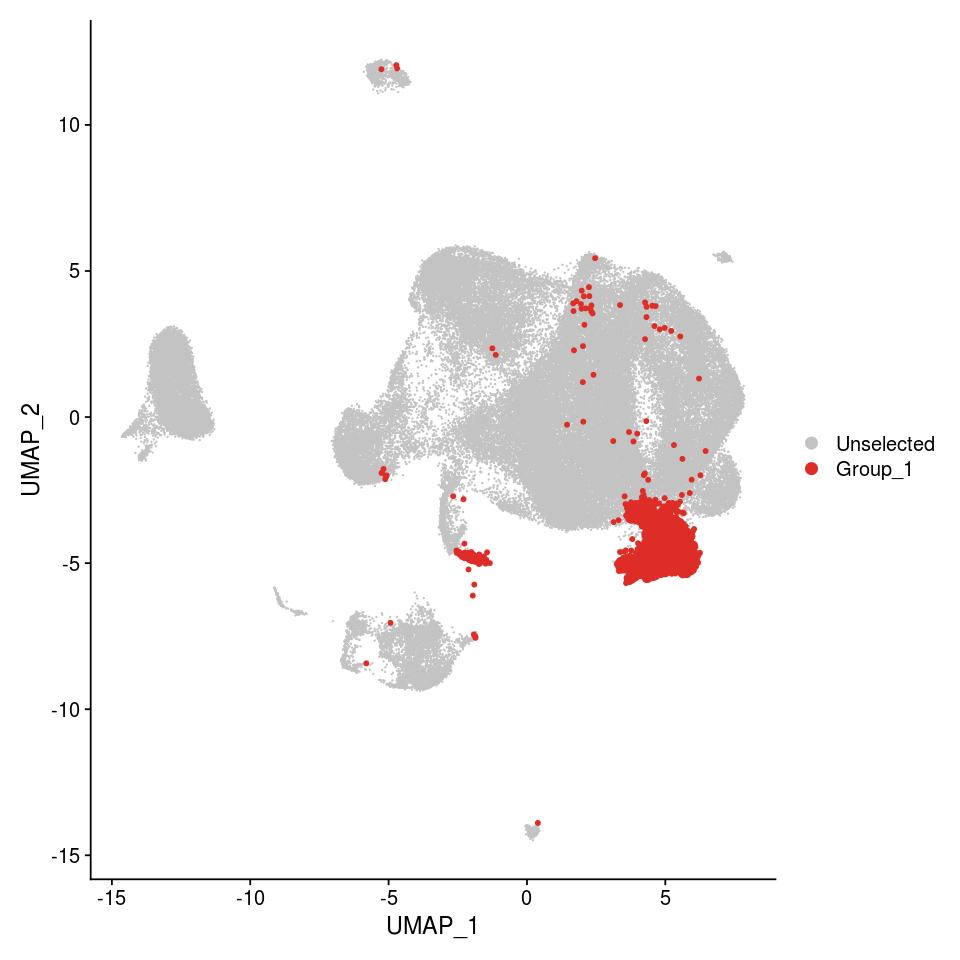

In [29]:
cells2remove = rownames(subset@meta.data[subset@meta.data$integrated_snn_res.0.1 == 6,])

message(paste("cells2remove:", length(unique(cells2remove))))

summary(subset@meta.data[cells2remove,]$percent.mt)
summary(subset@meta.data[cells2remove,]$nFeature_RNA)

summary(subset@meta.data[!rownames(subset@meta.data) %in% cells2remove,]$percent.mt)
summary(subset@meta.data[!rownames(subset@meta.data) %in% cells2remove,]$nFeature_RNA)

DimPlot(subset, cells.highlight = cells2remove)

An object of class Seurat 
64492 features across 84258 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 84258
Number of edges: 2633130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9552
Number of communities: 10
Elapsed time: 45 seconds


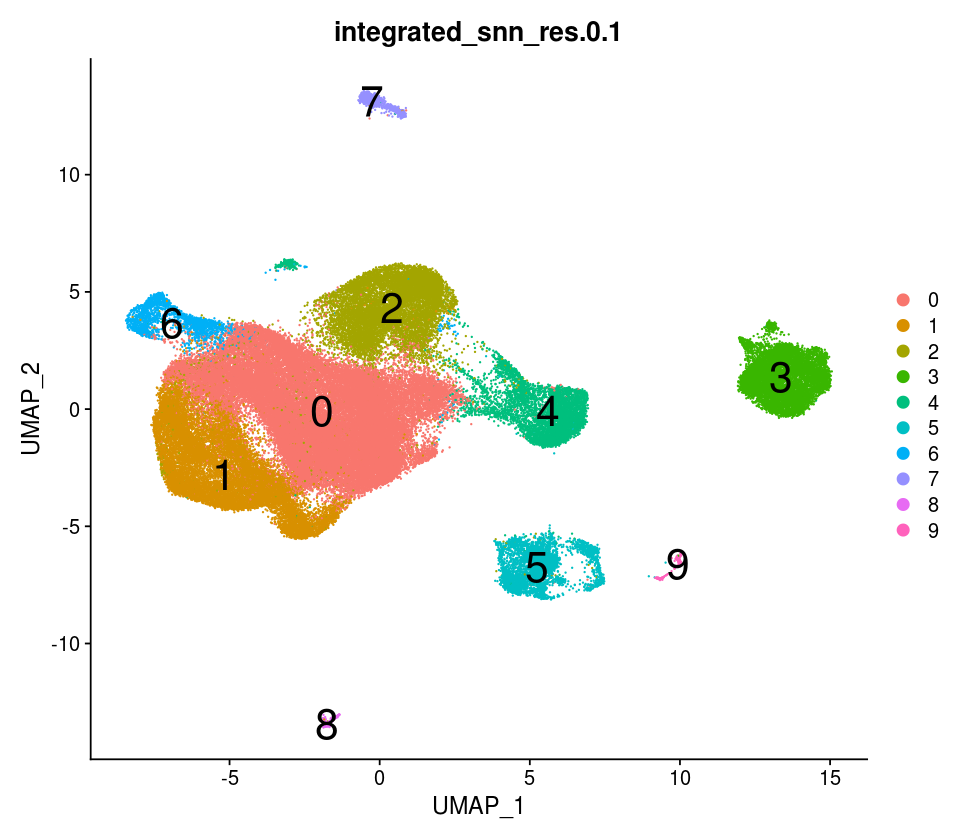

In [30]:
nobj = subset(subset, cells = rownames(subset@meta.data[!rownames(subset@meta.data) %in% cells2remove,]))

nobj

nobj <- ScaleData(nobj, verbose = FALSE)
nobj <- RunPCA(nobj, npcs = 50, verbose = FALSE)
nobj <- RunUMAP(nobj, reduction = "pca", dims = 1:50, verbose = F, n.neighbors = 35)

nobj = FindNeighbors(nobj, dims = 1:30)
nobj = FindClusters(nobj, resolution = 0.1)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(nobj, group.by = "integrated_snn_res.0.1", label = T, label.size = 9)

In [ ]:
c(3, 9, 5, 6, 4, 0, 1, 2, 7, 8)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 84258
Number of edges: 2633130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9707
Number of communities: 7
Elapsed time: 44 seconds


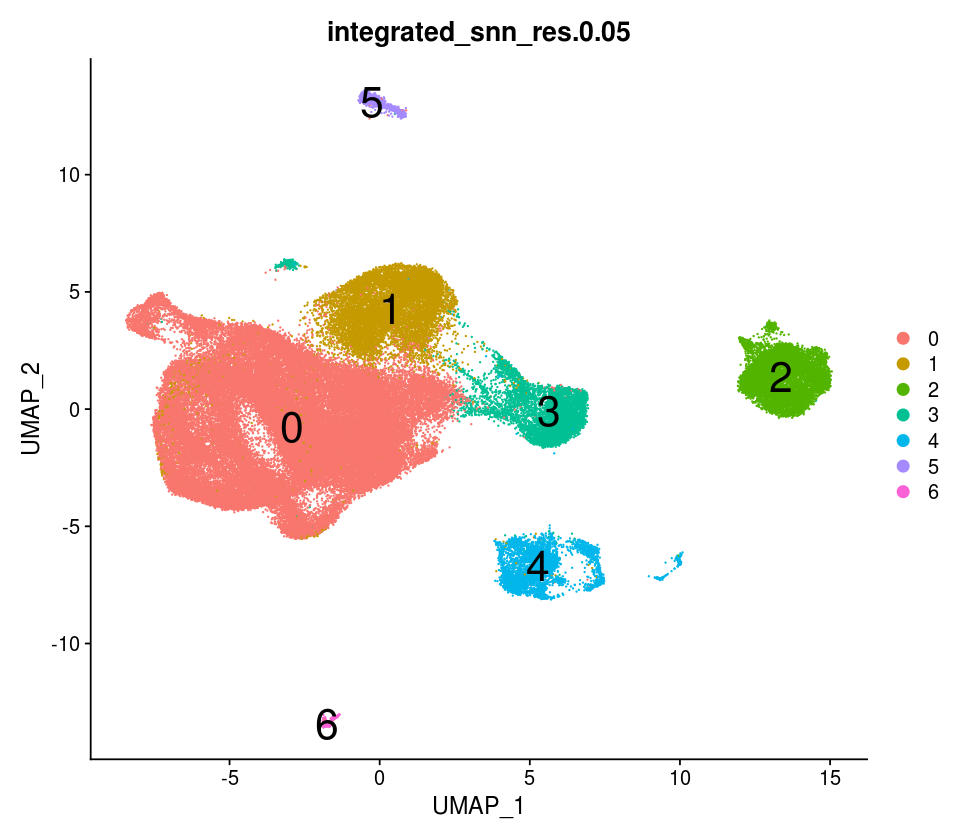

In [31]:
nobj = FindClusters(nobj, resolution = 0.05)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(nobj, group.by = "integrated_snn_res.0.05", label = T, label.size = 9)

In [ ]:
c(2, 4, 3, 0, 1, 5, 6)


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 84258
Number of edges: 2633130

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9600
Number of communities: 8
Elapsed time: 39 seconds


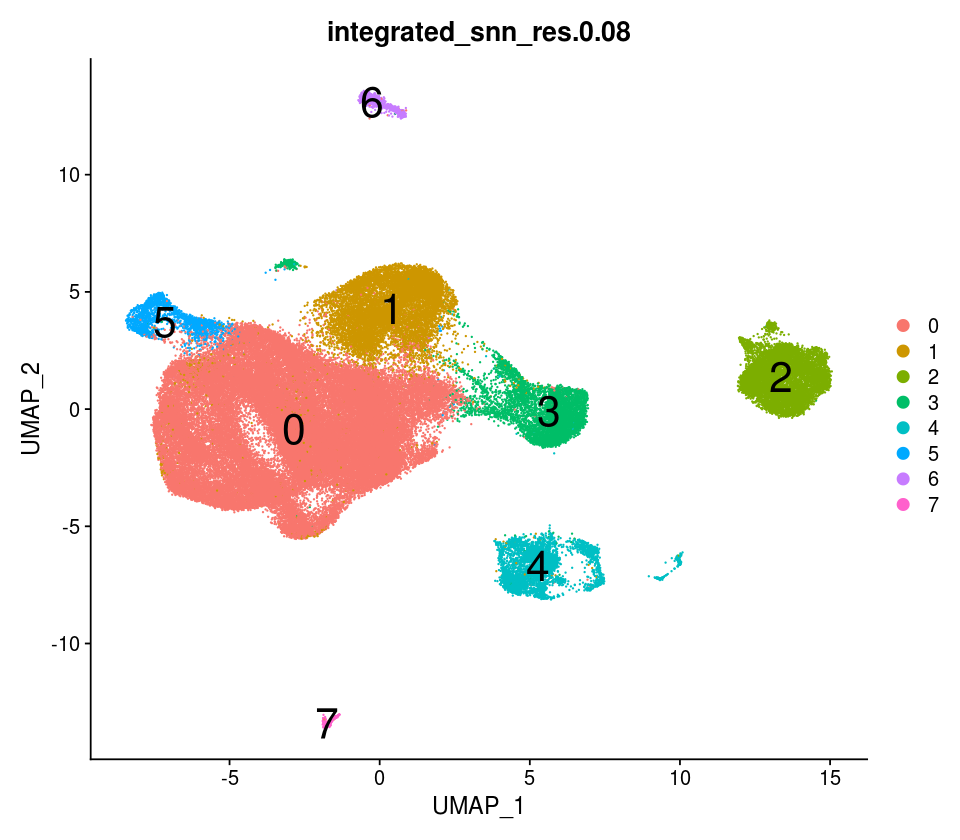

In [32]:
nobj = FindClusters(nobj, resolution = 0.08)

options(repr.plot.height = 7, repr.plot.width = 8)
DimPlot(nobj, group.by = "integrated_snn_res.0.08", label = T, label.size = 9)

In [34]:
str(nobj@meta.data)

'data.frame':	84258 obs. of  14 variables:
 $ orig.ident             : chr  "aggr_individual" "aggr_individual" "aggr_individual" "aggr_individual" ...
 $ nCount_RNA             : num  959 21162 30095 12245 4718 ...
 $ nFeature_RNA           : int  680 5803 6762 3585 2103 2376 1841 2752 6265 4020 ...
 $ percent.mt             : num  15.12 6.52 6.73 14.69 11.57 ...
 $ seurat_id              : chr  "AAACCCAAGAACCGCA-6_3" "AAACCCAAGAAGTCAT-2_3" "AAACCCAAGACAGCTG-2_3" "AAACCCAAGACCATGG-1_3" ...
 $ ngenes_gp              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ mt_gp                  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ integrated_snn_res.0.1 : Factor w/ 10 levels "0","1","2","3",..: 6 3 3 4 1 1 1 2 1 1 ...
 $ seurat_clusters        : Factor w/ 8 levels "0","1","2","3",..: 5 2 2 3 1 1 1 1 1 1 ...
 $ integrated_snn_res.0.15: Factor w/ 11 levels "0","1","2","3",..: 7 1 4 5 1 1 1 3 1 1 ...
 $ UMAP_1                 : num  -1.98 -1.97 -3.02 -12.38 1.29 ...
 $ UMAP_2                 

In [35]:
ppc = nobj
save(ppc, file = "../manuscript/ppc_filt.robj")

In [123]:
ppc

An object of class Seurat 
64492 features across 84258 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

# Add Subject Information

In [36]:
sample_meta = fread(paste("1.Metadata", "subject_sample_metadata.txt", sep = "/"), data.table = F)
sample_map = fread(paste("~/jn_projects/ppc_pilot/pipeline", "1.Metadata", "sample.map", sep = "/"), data.table = F)

In [101]:
head(sample_meta,2)
sample_map

,Subject_UUID,Sex,Age,Ethinicity,iPSCORE_Family,Cell_type,UDID,%PDX1+,%PDX1+_NKX6.1+,data_type,Sample_UUID,Pool Scheme,Number of Reads,Number of Peaks,Fraction of Reads in Peaks,Number of genes expressed at TPM > 1
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
1,eb1309e6-5567-437b-82d7-549c1c8d5493,F,65.3,EUR,52,iPSC,iPSC-PPC_034,NA,71.2,WGS,ac69bd1c-2131-4391-a2ee-b6c19b219c07,,NA,NA,NA,NA
2,725e0255-424c-44da-86c9-bc0bc14a21a8,F,62.8,AFR,15Q,PPC,PPC_023,96.41,91.7,WGS,916c0056-cef2-488f-ae44-cb9b1398669e,,NA,NA,NA,NA


subject_uuid,udid,sample_uuid.wgs,sample_uuid.rna,sample_uuid.scrna_live,sample_uuid.scrna_cryo,sample_uuid.snatac_cryp,sample_uuid.atac
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
eb1309e6-5567-437b-82d7-549c1c8d5493,iPSC-PPC_034,ac69bd1c-2131-4391-a2ee-b6c19b219c07,672cb8f3-f2b6-4429-9f80-29bea3cb0b45,3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd,,,
725e0255-424c-44da-86c9-bc0bc14a21a8,PPC_023,916c0056-cef2-488f-ae44-cb9b1398669e,0145d765-79e3-4234-b6e7-fa52969a47dd,fb6028d0-5ef0-4f53-bf73-da3983948ce1,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,a4b4d7a6-3f9c-4cfb-9272-47e1b99aee4a
9d988cb0-01b1-4d5d-bf4b-3fd3baf149a4,PPC_027,c7a966f7-e22e-4807-afff-2bae9ca5fc72,07e2ab6e-0032-4a42-97d4-e7087017ec8d,7d700751-e80d-40b6-9e79-0efec5ae5a80,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,818b7c8b-b314-4585-b61c-4861c4e64356
c3bb6245-5d1b-4dbc-8b16-b0ca47472e91,PPC_028,ee146263-82f5-4ed7-bb49-4300837acc85,dc5017d7-de77-45ae-8ecf-12b66ec50631,e2308d3d-f183-44e4-b0b7-2dff4a5006da,,,
90e8222f-2a97-4a3c-9517-fbd7626122fd,PPC_029,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,90681c57-4b83-4822-ae79-6c4cd29f0396,4efdab78-1eda-4888-8483-15b519c375dc,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,6e90a536-9cf9-4b2d-99ce-40185d18016a
7cf9e7b2-28a3-4b42-812b-929516fbce4a,PPC_030,4df98c9a-93f7-4735-80c8-24b1e8943549,a1f72a69-ef58-40bf-8b87-fd497e1ea5bf,4fd8f0f0-2356-451c-a61f-c30610f1141c,,,
eb1309e6-5567-437b-82d7-549c1c8d5493,PPC_034,ac69bd1c-2131-4391-a2ee-b6c19b219c07,26e5563e-8dc0-4045-b82c-6e7d012756c1,1eeda2ea-453a-4ff4-9cae-2a68f823d919,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,ec76959e-1786-4e8b-be46-6359f264d47d
90e8222f-2a97-4a3c-9517-fbd7626122fd,PPC_036,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,a33e63ce-0637-4177-b8e3-0c4851c308c4,eada4dfd-14cc-4767-8791-4a478eb3fe12,,,
5f5c5255-f41b-46eb-a9bd-7130515e3efc,PPC_051,4f63a2f0-b270-48f8-8603-38d0de2bec74,cbbd5fb8-217c-4cbb-b15b-6962d0fae2c6,,8f38fc74-ec4a-4014-8462-6e10e018f4c3,7a4c28c8-a2be-4370-b258-d05c27569928,


In [38]:
demux1 = fread("/projects/PPC/pipeline/scRNA-Seq/sample/scRNA_10x_MIX_PPC_001/outs/demuxlet_common.best", data.table = F) %>% mutate(orig.ident = "mix1")
demux2 = fread("/projects/PPC/pipeline/scRNA-Seq/sample/scRNA_10X_MIX_PPC_002/outs/demuxlet_common.best", data.table = F) %>% mutate(orig.ident = "mix2")

demux = rbind(demux1, demux2)
head(demux,1)

,BARCODE,RD.TOTL,RD.PASS,RD.UNIQ,N.SNP,BEST,SNG.1ST,SNG.LLK1,SNG.2ND,SNG.LLK2,⋯,ALPHA,LLK12,LLK1,LLK2,LLK10,LLK20,LLK00,PRB.DBL,PRB.SNG1,orig.ident
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,.,1864204,318456,287331,48938,DBL-c7a966f7-e22e-4807-afff-2bae9ca5fc72-916c0056-cef2-488f-ae44-cb9b1398669e-0.400,c7a966f7-e22e-4807-afff-2bae9ca5fc72,-68242.17,916c0056-cef2-488f-ae44-cb9b1398669e,-69633.34,⋯,0.4,-36949.17,-68242.17,-69633.34,-43578.91,-41191.56,-31400.44,1,NaN,mix1


In [126]:
meta = ppc@meta.data

## Aggr

In [127]:
# Aggr

wgs = sample_meta[sample_meta$data_type == "WGS",c("Subject_UUID", "Sample_UUID")] 
colnames(wgs) = c("Subject_UUID", "wgs_uuid")

rna = sample_meta[sample_meta$data_type == "scRNA-seq (Live)",c("Subject_UUID", "Sample_UUID", "UDID", "Cell_type")]
colnames(rna) = c("Subject_UUID", "rna_uuid", "UDID", "Cell_type")

wgs2rna = unique(merge(wgs, rna, by = "Subject_UUID"))

aggr         = meta[meta$orig.ident %like% "aggr",]
message(paste("# cells aggr:", nrow(aggr)))

aggr$BARCODE = unlist(lapply(rownames(aggr), function(x) { unlist(strsplit(x, "_"))[1] }))
aggr$aggr_id = unlist(lapply(rownames(aggr), function(x) { unlist(strsplit(unlist(strsplit(x, "-"))[2], "_"))[1] }))

aggr_meta         = fread("/projects/PPC/pipeline/scRNA-Seq/sample/aggr_individual/outs/aggr.csv", data.table = F, sep = ",")
aggr_meta$aggr_id = c(1:nrow(aggr_meta))

aggr$rna_uuid     = suppressMessages(mapvalues(aggr$aggr_id, from = aggr_meta$aggr_id, to = aggr_meta$sample_id))

aggr[,c("SNG.1ST", "SNG.LLK1", "SNG.LLK2", "SNG.2ND","orig.ident", "BEST")] = NA

aggr$sample_type  = "Live"
aggr$udid         = suppressMessages(mapvalues(aggr$rna_uuid, from = wgs2rna$rna_uuid, to = wgs2rna$UDID))
aggr$wgs_uuid     = suppressMessages(mapvalues(aggr$udid, from = wgs2rna$UDID, to = wgs2rna$wgs_uuid))
aggr$subject_uuid = suppressMessages(mapvalues(aggr$udid, from = wgs2rna$UDID, to = wgs2rna$Subject_UUID))
aggr$orig.ident   = "aggr"

message(paste("# cells aggr:", nrow(aggr)))

head(aggr,2)

# cells aggr: 65122

# cells aggr: 65122



,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_id,ngenes_gp,mt_gp,integrated_snn_res.0.1,seurat_clusters,integrated_snn_res.0.15,⋯,rna_uuid,SNG.1ST,SNG.LLK1,SNG.LLK2,SNG.2ND,BEST,sample_type,udid,wgs_uuid,subject_uuid
,<chr>,<dbl>,<int>,<dbl>,<chr>,<lgl>,<lgl>,<fct>,<fct>,<fct>,⋯,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>
AAACCCAAGAACCGCA-6_3,aggr,959,680,15.119917,AAACCCAAGAACCGCA-6_3,TRUE,TRUE,5,4,6,⋯,e2308d3d-f183-44e4-b0b7-2dff4a5006da,NA,NA,NA,NA,NA,Live,PPC_028,ee146263-82f5-4ed7-bb49-4300837acc85,c3bb6245-5d1b-4dbc-8b16-b0ca47472e91
AAACCCAAGAAGTCAT-2_3,aggr,21162,5803,6.521123,AAACCCAAGAAGTCAT-2_3,TRUE,TRUE,2,1,0,⋯,3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd,NA,NA,NA,NA,NA,Live,iPSC-PPC_034,ac69bd1c-2131-4391-a2ee-b6c19b219c07,eb1309e6-5567-437b-82d7-549c1c8d5493


## Pool

In [128]:
# Pool

wgs = sample_meta[sample_meta$data_type == "WGS",c("Subject_UUID", "Sample_UUID")]
colnames(wgs) = c("Subject_UUID", "wgs_uuid")

rna = sample_meta[sample_meta$data_type == "scRNA-seq (Cryopreserved)" & sample_meta[,"Pool Scheme"] != "",c("Subject_UUID", "Sample_UUID", "UDID")]
colnames(rna) = c("Subject_UUID", "rna_uuid", "UDID")

wgs2rna = unique(merge(wgs, rna, by = "Subject_UUID"))

mix  = meta[!meta$orig.ident %like% "aggr",]

message(paste("# number of mixed cells:", nrow(mix)))

mix$BARCODE   = unlist(lapply(rownames(mix), function(x) { unlist(strsplit(x, "_"))[1] }))
mix$seurat_id = rownames(mix)

mix$orig.ident = ifelse(mix$orig.ident %like% "001", "mix1", "mix2")
nrow(mix)
mix = merge(mix, demux[,c("SNG.1ST", "SNG.2ND", "BARCODE", "orig.ident", "SNG.LLK1", "SNG.LLK2", "BEST")], by = c("BARCODE", "orig.ident"))
nrow(mix)

message(paste("# number of mixed cells:", nrow(mix)))

mix$sample_type = "Cryo"
mix$wgs_uuid    = mix$SNG.1ST

rownames(mix) = mix$seurat_id

head(mix,2)

# number of mixed cells: 19136



[1] 19136

[1] 19136

# number of mixed cells: 19136



,BARCODE,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_id,ngenes_gp,mt_gp,integrated_snn_res.0.1,seurat_clusters,integrated_snn_res.0.15,UMAP_1,UMAP_2,integrated_snn_res.0.05,integrated_snn_res.0.08,SNG.1ST,SNG.2ND,SNG.LLK1,SNG.LLK2,BEST
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<lgl>,<lgl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,AAACCCAAGAGGGTCT-1,mix1,4718,2103,11.572700,AAACCCAAGAGGGTCT-1_1,TRUE,TRUE,0,0,0,1.288437,-0.7632066,0,0,ac69bd1c-2131-4391-a2ee-b6c19b219c07,ee146263-82f5-4ed7-bb49-4300837acc85,-245.4275,-577.1617,DBL-ac69bd1c-2131-4391-a2ee-b6c19b219c07-ee146263-82f5-4ed7-bb49-4300837acc85-0.100
2,AAACCCAAGCAATAGT-1,mix1,6256,2752,6.409847,AAACCCAAGCAATAGT-1_1,TRUE,TRUE,1,0,2,7.268831,-2.3048928,0,0,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,c7a966f7-e22e-4807-afff-2bae9ca5fc72,-314.7248,-816.8032,DBL-9bff6491-20c4-410a-98f6-4b4ee6aaf97d-ee146263-82f5-4ed7-bb49-4300837acc85-0.100


,BARCODE,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,seurat_id,ngenes_gp,mt_gp,integrated_snn_res.0.1,seurat_clusters,⋯,UMAP_2,integrated_snn_res.0.05,integrated_snn_res.0.08,SNG.1ST,SNG.2ND,SNG.LLK1,SNG.LLK2,BEST,sample_type,wgs_uuid
,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<lgl>,<lgl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
AAACCCAAGAGGGTCT-1_1,AAACCCAAGAGGGTCT-1,mix1,4718,2103,11.572700,AAACCCAAGAGGGTCT-1_1,TRUE,TRUE,0,0,⋯,-0.7632066,0,0,ac69bd1c-2131-4391-a2ee-b6c19b219c07,ee146263-82f5-4ed7-bb49-4300837acc85,-245.4275,-577.1617,DBL-ac69bd1c-2131-4391-a2ee-b6c19b219c07-ee146263-82f5-4ed7-bb49-4300837acc85-0.100,Cryo,ac69bd1c-2131-4391-a2ee-b6c19b219c07
AAACCCAAGCAATAGT-1_1,AAACCCAAGCAATAGT-1,mix1,6256,2752,6.409847,AAACCCAAGCAATAGT-1_1,TRUE,TRUE,1,0,⋯,-2.3048928,0,0,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,c7a966f7-e22e-4807-afff-2bae9ca5fc72,-314.7248,-816.8032,DBL-9bff6491-20c4-410a-98f6-4b4ee6aaf97d-ee146263-82f5-4ed7-bb49-4300837acc85-0.100,Cryo,9bff6491-20c4-410a-98f6-4b4ee6aaf97d


In [130]:
# Remove 

a = mix[mix$orig.ident == "mix1" & mix$wgs_uuid %in% sample_map[sample_map$sample_uuid.scrna_cryo %like% "04cd",]$sample_uuid.wgs,]
b = mix[mix$orig.ident == "mix2" & mix$wgs_uuid %in% sample_map[sample_map$sample_uuid.scrna_cryo %like% "8f38",]$sample_uuid.wgs,]

message(paste("# mix cells mapping to expected individuals:", nrow(a) + nrow(b)))
message(paste("% mix cells mapping to expected individuals:", (nrow(a) + nrow(b)) / nrow(mix)))

a = mix[mix$orig.ident == "mix1" & !mix$wgs_uuid %in% sample_map[sample_map$sample_uuid.scrna_cryo %like% "04cd",]$sample_uuid.wgs,]
b = mix[mix$orig.ident == "mix2" & !mix$wgs_uuid %in% sample_map[sample_map$sample_uuid.scrna_cryo %like% "8f38",]$sample_uuid.wgs,]

message(paste("# mix cells NOT mapping to expected individuals:", nrow(a) + nrow(b)))
message(paste("% mix cells NOT mapping to expected individuals:", (nrow(a) + nrow(b)) / nrow(mix)))



# mix cells mapping to expected individuals: 19103

% mix cells mapping to expected individuals: 0.998275501672241

# mix cells NOT mapping to expected individuals: 33

% mix cells NOT mapping to expected individuals: 0.0017244983277592



In [136]:
str(demux)

'data.frame':	264635 obs. of  23 variables:
 $ BARCODE   : chr  "." "AAACCCAAGAAGAGCA-1" "AAACCCAAGAATTGCA-1" "AAACCCAAGACGGAAA-1" ...
 $ RD.TOTL   : int  1864204 43 2 2 231 5729 193 1 7733 290 ...
 $ RD.PASS   : int  318456 2 2 4 54 906 33 2 1355 91 ...
 $ RD.UNIQ   : int  287331 2 2 4 54 878 33 2 1353 91 ...
 $ N.SNP     : int  48938 2 2 4 54 806 33 2 1064 91 ...
 $ BEST      : chr  "DBL-c7a966f7-e22e-4807-afff-2bae9ca5fc72-916c0056-cef2-488f-ae44-cb9b1398669e-0.400" "AMB-ac69bd1c-2131-4391-a2ee-b6c19b219c07-916c0056-cef2-488f-ae44-cb9b1398669e-ac69bd1c-2131-4391-a2ee-b6c19b219"| __truncated__ "AMB-ac69bd1c-2131-4391-a2ee-b6c19b219c07-916c0056-cef2-488f-ae44-cb9b1398669e-ac69bd1c-2131-4391-a2ee-b6c19b219"| __truncated__ "AMB-ac69bd1c-2131-4391-a2ee-b6c19b219c07-916c0056-cef2-488f-ae44-cb9b1398669e-ac69bd1c-2131-4391-a2ee-b6c19b219"| __truncated__ ...
 $ SNG.1ST   : chr  "c7a966f7-e22e-4807-afff-2bae9ca5fc72" "ac69bd1c-2131-4391-a2ee-b6c19b219c07" "ac69bd1c-2131-4391-a2ee-b6c19b219c07

In [64]:
# keep
mix = mix[!rownames(mix) %in% c(rownames(a), rownames(b)),]
nrow(mix)

[1] 19103

In [65]:
mix$subject_uuid = suppressMessages(mapvalues(mix$wgs_uuid, from = wgs2rna$wgs_uuid, to = wgs2rna$Subject_UUID))
mix$udid         = suppressMessages(mapvalues(mix$subject_uuid, from = wgs2rna$Subject_UUID, to = wgs2rna$UDID))
mix$rna_uuid     = suppressMessages(mapvalues(mix$udid, from = wgs2rna$UDID, to = wgs2rna$rna_uuid))

nrow(mix)

[1] 19103

In [69]:
colnames(mix)[which(!colnames(mix) %in% colnames(aggr))]
colnames(aggr)[which(!colnames(aggr) %in% colnames(mix))]

meta = rbind(mix %>% mutate(aggr_id = NA), aggr)

character(0)

[1] "aggr_id"

In [71]:
nrow(meta)

[1] 84225

In [73]:
ppc

ppc2 = subset(ppc, cells = rownames(meta))

ppc2

An object of class Seurat 
64492 features across 84258 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
64492 features across 84225 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [74]:
rownames(meta)[which(!rownames(meta) %in% rownames(ppc2@meta.data))]

character(0)

In [75]:
ppc2@meta.data = meta

In [76]:
save(ppc2, file = "../manuscript/ppc_filt2.robj")

In [79]:
str(ppc2@meta.data)

'data.frame':	84225 obs. of  26 variables:
 $ BARCODE                : chr  "AAACCCAAGAGGGTCT-1" "AAACCCAAGCAATAGT-1" "AAACCCAAGCATTGAA-1" "AAACCCAAGGTACAGC-1" ...
 $ orig.ident             : chr  "mix1" "mix1" "mix2" "mix1" ...
 $ nCount_RNA             : num  4718 6256 12681 7427 16147 ...
 $ nFeature_RNA           : int  2103 2752 4020 3071 4808 2540 3281 4234 4326 2992 ...
 $ percent.mt             : num  11.57 6.41 9.66 9.12 9.25 ...
 $ seurat_id              : chr  "AAACCCAAGAGGGTCT-1_1" "AAACCCAAGCAATAGT-1_1" "AAACCCAAGCATTGAA-1_2" "AAACCCAAGGTACAGC-1_1" ...
 $ ngenes_gp              : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ mt_gp                  : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ integrated_snn_res.0.1 : Factor w/ 10 levels "0","1","2","3",..: 1 2 1 1 1 2 1 1 1 2 ...
 $ seurat_clusters        : Factor w/ 8 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ integrated_snn_res.0.15: Factor w/ 11 levels "0","1","2","3",..: 1 3 1 1 1 3 1 1 1 3 ...
 $ UMAP_1        

In [89]:
table(ppc2@meta.data$udid, ppc2@meta.data$integrated_snn_res.0.08)

              
                  0    1    2    3    4    5    6    7
  iPSC-PPC_034 6326 1756    0  372  801  127   96   28
  PPC_023      8983 2121    0    9   51  383  144  115
  PPC_027      9311 2138    0    7   38  373   79   39
  PPC_028        88   36    0 3966 2125  159   87   21
  PPC_029      8119  935    0    7   31  287  260   70
  PPC_030      6793 1592    0   34  185  145   70   47
  PPC_034       868  223 8091  206  547   83   30    7
  PPC_036      6847  812    0    1    2  127   97   20
  PPC_051      1799  399    0  108  208  104    4    3
  PPC_134      1052  514    1  633  312   60    1   24
  PPC_150      1897  420    0   68   60  142   83   18

In [90]:
ppc2@meta.data[ppc2@meta.data$udid == "iPSC-PPC_034", "udid"] = "PPC_034.2"
ppc2@meta.data[ppc2@meta.data$udid == "PPC_034"     , "udid"] = "iPSC-PPC_034"
ppc2@meta.data[ppc2@meta.data$udid == "PPC_034.2"   , "udid"] = "PPC_034"

In [96]:
data.frame(table(ppc2@meta.data[ppc2@meta.data$wgs_uuid %like% "iPSC",]$integrated_snn_res.0.08) / nrow(ppc2@meta.data[ppc2@meta.data$udid %like% "iPSC",]) * 100)

Var1,Freq
<fct>,<dbl>
0,8.63252113
1,2.21780209
2,80.46742914
3,2.04873197
4,5.44007956
5,0.82545997
6,0.29835903
7,0.06961711


In [98]:
table(ppc2@meta.data$rna_uuid, ppc2@meta.data$integrated_snn_res.0.08)

                                      
                                          0    1    2    3    4    5    6    7
  04cd9285-b478-468a-a055-a9d82c99b016 7892 1670    0  225  617  505  189   95
  1eeda2ea-453a-4ff4-9cae-2a68f823d919    0    0 8091    0    0    0    0    0
  3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd 6326 1756    0  372  801  127   96   28
  4efdab78-1eda-4888-8483-15b519c375dc 6084  666    0    2   17  202  180   49
  4fd8f0f0-2356-451c-a61f-c30610f1141c 6793 1592    0   34  185  145   70   47
  7d700751-e80d-40b6-9e79-0efec5ae5a80 6638 1500    0    0   11  211   55   19
  8f38fc74-ec4a-4014-8462-6e10e018f4c3 4748 1333    1  809  580  306   88   45
  e2308d3d-f183-44e4-b0b7-2dff4a5006da   88   36    0 3966 2125  159   87   21
  eada4dfd-14cc-4767-8791-4a478eb3fe12 6847  812    0    1    2  127   97   20
  fb6028d0-5ef0-4f53-bf73-da3983948ce1 6667 1581    0    2   22  208   89   68

In [92]:
save(ppc2, file = "../manuscript/ppc_filt2.robj")

In [102]:
ppc2@meta.data[ppc2@meta.data$rna_uuid == "1eeda2ea-453a-4ff4-9cae-2a68f823d919", "udid"] = "iPSC-PPC_034"
ppc2@meta.data[ppc2@meta.data$rna_uuid == "3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd", "udid"] = "PPC_034"
ppc2@meta.data[ppc2@meta.data$rna_uuid == "04cd9285-b478-468a-a055-a9d82c99b016" & ppc2@meta.data$udid == "iPSC-PPC_034", "udid"] = "PPC_034"

In [105]:
cellmap = data.frame(cluster  = c(0:7),
                     rna.cell = c("Late PPC", "Rep. Late PPC", "iPSC", "Early PPC", "Mesendoderm", "Early DE", "Endocrine", "Early Ductal"),
                     color = c("#1B9E77", "#5fb189", "#7570B3", "#bbd2a6", "#E7298A", "#E6AB02", "#A6761D", "#666666"))

In [108]:
sample_meta = fread(paste("1.Metadata", "subject_sample_metadata.txt", sep = "/"), data.table = F)

ppc2@meta.data$pdx1_nkx61 = suppressMessages(mapvalues(ppc2@meta.data$udid, from = sample_meta$UDID, to = sample_meta[,"%PDX1+_NKX6.1+"]))
ppc2@meta.data$cell = as.vector(suppressMessages(mapvalues(ppc2@meta.data$integrated_snn_res.0.08, from = cellmap$cluster, to = cellmap$rna.cell)))
ppc2@meta.data[ppc2@meta.data$udid == "PPC_034",]$pdx1_nkx61 = 71.2
ppc2@meta.data[ppc2@meta.data$udid %like% "iPSC",]$pdx1_nkx61 = NA

In [109]:
ppc2@meta.data[,c("UMAP_1", "UMAP_2")] = NULL
ppc2@meta.data = add_rownames(merge(ppc2@meta.data, Embeddings(ppc2, "umap"), by = "row.names"))

In [122]:
nrow(ppc2@meta.data[ppc2@meta.data$cell == "Late PPC",]) / nrow(ppc2@meta.data[ppc2@meta.data$cell != "iPSC",]) * 100

nrow(ppc2@meta.data[ppc2@meta.data$cell == "Late PPC",])
nrow(ppc2@meta.data[ppc2@meta.data$cell != "iPSC",])

[1] 68.41054

[1] 52083

[1] 76133

In [114]:
table(ppc2@meta.data$udid, ppc2@meta.data$cell) 

              
               Early DE Early Ductal Early PPC Endocrine iPSC Late PPC
  iPSC-PPC_034        0            0         0         0 8091        0
  PPC_023           383          115         9       144    0     8983
  PPC_027           373           39         7        79    0     9311
  PPC_028           159           21      3966        87    0       88
  PPC_029           287           70         7       260    0     8119
  PPC_030           145           47        34        70    0     6793
  PPC_034           210           35       578       126    0     7194
  PPC_036           127           20         1        97    0     6847
  PPC_051           104            3       108         4    0     1799
  PPC_134            60           24       633         1    1     1052
  PPC_150           142           18        68        83    0     1897
              
               Mesendoderm Rep. Late PPC
  iPSC-PPC_034           0             0
  PPC_023               51          

In [111]:
save(ppc2, file = "../manuscript/ppc_filt2.robj")

In [104]:
sample_map

subject_uuid,udid,sample_uuid.wgs,sample_uuid.rna,sample_uuid.scrna_live,sample_uuid.scrna_cryo,sample_uuid.snatac_cryp,sample_uuid.atac
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
eb1309e6-5567-437b-82d7-549c1c8d5493,iPSC-PPC_034,ac69bd1c-2131-4391-a2ee-b6c19b219c07,672cb8f3-f2b6-4429-9f80-29bea3cb0b45,3ab5e63d-1d2d-441b-b1c3-7f77fd86e4dd,,,
725e0255-424c-44da-86c9-bc0bc14a21a8,PPC_023,916c0056-cef2-488f-ae44-cb9b1398669e,0145d765-79e3-4234-b6e7-fa52969a47dd,fb6028d0-5ef0-4f53-bf73-da3983948ce1,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,a4b4d7a6-3f9c-4cfb-9272-47e1b99aee4a
9d988cb0-01b1-4d5d-bf4b-3fd3baf149a4,PPC_027,c7a966f7-e22e-4807-afff-2bae9ca5fc72,07e2ab6e-0032-4a42-97d4-e7087017ec8d,7d700751-e80d-40b6-9e79-0efec5ae5a80,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,818b7c8b-b314-4585-b61c-4861c4e64356
c3bb6245-5d1b-4dbc-8b16-b0ca47472e91,PPC_028,ee146263-82f5-4ed7-bb49-4300837acc85,dc5017d7-de77-45ae-8ecf-12b66ec50631,e2308d3d-f183-44e4-b0b7-2dff4a5006da,,,
90e8222f-2a97-4a3c-9517-fbd7626122fd,PPC_029,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,90681c57-4b83-4822-ae79-6c4cd29f0396,4efdab78-1eda-4888-8483-15b519c375dc,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,6e90a536-9cf9-4b2d-99ce-40185d18016a
7cf9e7b2-28a3-4b42-812b-929516fbce4a,PPC_030,4df98c9a-93f7-4735-80c8-24b1e8943549,a1f72a69-ef58-40bf-8b87-fd497e1ea5bf,4fd8f0f0-2356-451c-a61f-c30610f1141c,,,
eb1309e6-5567-437b-82d7-549c1c8d5493,PPC_034,ac69bd1c-2131-4391-a2ee-b6c19b219c07,26e5563e-8dc0-4045-b82c-6e7d012756c1,1eeda2ea-453a-4ff4-9cae-2a68f823d919,04cd9285-b478-468a-a055-a9d82c99b016,83b3e7ac-0e82-4bef-8648-2ece13090551,ec76959e-1786-4e8b-be46-6359f264d47d
90e8222f-2a97-4a3c-9517-fbd7626122fd,PPC_036,9bff6491-20c4-410a-98f6-4b4ee6aaf97d,a33e63ce-0637-4177-b8e3-0c4851c308c4,eada4dfd-14cc-4767-8791-4a478eb3fe12,,,
5f5c5255-f41b-46eb-a9bd-7130515e3efc,PPC_051,4f63a2f0-b270-48f8-8603-38d0de2bec74,cbbd5fb8-217c-4cbb-b15b-6962d0fae2c6,,8f38fc74-ec4a-4014-8462-6e10e018f4c3,7a4c28c8-a2be-4370-b258-d05c27569928,
